# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "../output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [4]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
city_left_count = len(cities)
city_left_count

608

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).

> **HINT:** The OpenWeatherMap API only allows 60 calls per minute under their free plan. Try using `time.sleep(60)` after each set of 50 cities to avoid API errors due to large calls.

In [5]:
#Setting the lists for our Data Frame
sets = [cities[x:x+50] for x in range(0,len(cities),50)]
lat = []
lng = []
max_temp = []
humidity=[]
cloudiness = []
wind_speed = []
country = []
date = []
cities2 = []
# Saving config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"
# Building partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="
print(f"Beginning Data Retrieval")
# Creating a loop through each rown in the dataframe to gather each city's weather info
for i in range(10):
    print(f"--------------------------------")
    time.sleep(10)
    for x in range(50):
        response = requests.get(query_url + sets[i][x]).json()
        # using try/except construct to skip over missing cities or missing data
        try:
            lat.append(response['coord']['lat'])
            lng.append(response['coord']['lon'])
            max_temp.append(response['main']['temp_max'])
            humidity.append(response['main']['humidity'])
            cloudiness.append(response['clouds']['all'])
            wind_speed.append(response['wind']['speed'])
            country.append(response['sys']['country'])
            date.append(response['dt'])
            cities2.append(sets[i][x])
            print(f" Processing Record {x+1} of Set {i+1} | {sets[i][x]}")
        except:
            print(f"City not found. Skipping...")
           
            pass
print("------------------------------\nData Retrieval Complete\n------------------------------")

Beginning Data Retrieval
--------------------------------
 Processing Record 1 of Set 1 | chuy
 Processing Record 2 of Set 1 | lata
 Processing Record 3 of Set 1 | shubarshi
 Processing Record 4 of Set 1 | barrow
 Processing Record 5 of Set 1 | hasaki
City not found. Skipping...
 Processing Record 7 of Set 1 | ca mau
 Processing Record 8 of Set 1 | ilulissat
 Processing Record 9 of Set 1 | fairbanks
 Processing Record 10 of Set 1 | georgetown
 Processing Record 11 of Set 1 | jamestown
 Processing Record 12 of Set 1 | upernavik
 Processing Record 13 of Set 1 | cowra
 Processing Record 14 of Set 1 | waingapu
 Processing Record 15 of Set 1 | jiuquan
 Processing Record 16 of Set 1 | bafq
 Processing Record 17 of Set 1 | tocopilla
City not found. Skipping...
 Processing Record 19 of Set 1 | rikitea
 Processing Record 20 of Set 1 | port elizabeth
 Processing Record 21 of Set 1 | hermanus
 Processing Record 22 of Set 1 | gbadolite
 Processing Record 23 of Set 1 | shingu
 Processing Record 24 

 Processing Record 47 of Set 4 | nuuk
 Processing Record 48 of Set 4 | taldan
 Processing Record 49 of Set 4 | beringovskiy
 Processing Record 50 of Set 4 | cahors
--------------------------------
 Processing Record 1 of Set 5 | pinotepa nacional
 Processing Record 2 of Set 5 | chimbote
 Processing Record 3 of Set 5 | vilcun
 Processing Record 4 of Set 5 | thompson
City not found. Skipping...
 Processing Record 6 of Set 5 | tarrega
 Processing Record 7 of Set 5 | severo-kurilsk
City not found. Skipping...
 Processing Record 9 of Set 5 | mount isa
 Processing Record 10 of Set 5 | kasane
 Processing Record 11 of Set 5 | houlton
 Processing Record 12 of Set 5 | bidor
 Processing Record 13 of Set 5 | victoria
 Processing Record 14 of Set 5 | faanui
 Processing Record 15 of Set 5 | kaitangata
 Processing Record 16 of Set 5 | isangel
City not found. Skipping...
City not found. Skipping...
 Processing Record 19 of Set 5 | ardakan
 Processing Record 20 of Set 5 | naze
 Processing Record 21 of 

 Processing Record 47 of Set 8 | imbituba
 Processing Record 48 of Set 8 | flin flon
 Processing Record 49 of Set 8 | sungaipenuh
 Processing Record 50 of Set 8 | guerrero negro
--------------------------------
 Processing Record 1 of Set 9 | monrovia
 Processing Record 2 of Set 9 | kupang
 Processing Record 3 of Set 9 | formosa
 Processing Record 4 of Set 9 | altamont
 Processing Record 5 of Set 9 | bemidji
 Processing Record 6 of Set 9 | inhambane
City not found. Skipping...
 Processing Record 8 of Set 9 | lisakovsk
 Processing Record 9 of Set 9 | vilhena
 Processing Record 10 of Set 9 | indramayu
 Processing Record 11 of Set 9 | shizunai
 Processing Record 12 of Set 9 | bumba
 Processing Record 13 of Set 9 | siniscola
City not found. Skipping...
 Processing Record 15 of Set 9 | nadvoitsy
 Processing Record 16 of Set 9 | viransehir
 Processing Record 17 of Set 9 | alice
 Processing Record 18 of Set 9 | chingola
 Processing Record 19 of Set 9 | izhma
 Processing Record 20 of Set 9 | d

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | butaritari
Processing Record 2 of Set 1 | yerbogachen
Processing Record 3 of Set 1 | cape town
Processing Record 4 of Set 1 | touba
Processing Record 5 of Set 1 | jamestown
Processing Record 6 of Set 1 | rio grande
Processing Record 7 of Set 1 | ibra
Processing Record 8 of Set 1 | port elizabeth
Processing Record 9 of Set 1 | tuktoyaktuk
Processing Record 10 of Set 1 | avarua
Processing Record 11 of Set 1 | nemuro
Processing Record 12 of Set 1 | morgan city
Processing Record 13 of Set 1 | hobart
Processing Record 14 of Set 1 | kawalu
Processing Record 15 of Set 1 | hami
Processing Record 16 of Set 1 | ushuaia
Processing Record 17 of Set 1 | katsuura
Processing Record 18 of Set 1 | hjallerup
Processing Record 19 of Set 1 | punta arenas
Processing Record 20 of Set 1 | bengkulu
Processing Record 21 of Set 1 | victoria
Processing Record 22 of Set 1 | rangapara
Processing Record 23 of Set 1 | hithadho

Processing Record 36 of Set 4 | chimbote
Processing Record 37 of Set 4 | kanor
Processing Record 38 of Set 4 | san pedro de uraba
Processing Record 39 of Set 4 | taphan hin
Processing Record 40 of Set 4 | upernavik
Processing Record 41 of Set 4 | matagami
Processing Record 42 of Set 4 | terme
Processing Record 43 of Set 4 | coria
Processing Record 44 of Set 4 | pallasovka
Processing Record 45 of Set 4 | asyut
Processing Record 46 of Set 4 | cockburn town
Processing Record 47 of Set 4 | osypenko
Processing Record 48 of Set 4 | sioux lookout
Processing Record 49 of Set 4 | gotsu
Processing Record 0 of Set 5 | abadan
Processing Record 1 of Set 5 | lewistown
Processing Record 2 of Set 5 | toftir
City not found. Skipping...
Processing Record 3 of Set 5 | fortuna
Processing Record 4 of Set 5 | ostersund
Processing Record 5 of Set 5 | calafell
Processing Record 6 of Set 5 | panguna
Processing Record 7 of Set 5 | nantucket
Processing Record 8 of Set 5 | la ronge
Processing Record 9 of Set 5 | 

City not found. Skipping...
Processing Record 28 of Set 8 | porto walter
Processing Record 29 of Set 8 | horsham
Processing Record 30 of Set 8 | maraa
Processing Record 31 of Set 8 | vila franca do campo
Processing Record 32 of Set 8 | garoua
Processing Record 33 of Set 8 | kampot
Processing Record 34 of Set 8 | marawi
Processing Record 35 of Set 8 | egvekinot
Processing Record 36 of Set 8 | liverpool
Processing Record 37 of Set 8 | sanandaj
Processing Record 38 of Set 8 | tabou
Processing Record 39 of Set 8 | kavieng
Processing Record 40 of Set 8 | cap malheureux
Processing Record 41 of Set 8 | logan
Processing Record 42 of Set 8 | klaksvik
Processing Record 43 of Set 8 | sisimiut
Processing Record 44 of Set 8 | whyalla
Processing Record 45 of Set 8 | attawapiskat
City not found. Skipping...
Processing Record 46 of Set 8 | hailar
Processing Record 47 of Set 8 | ajdabiya
Processing Record 48 of Set 8 | saint-georges
Processing Record 49 of Set 8 | hoopstad
Processing Record 0 of Set 9 

Processing Record 19 of Set 12 | barra dos coqueiros
Processing Record 20 of Set 12 | provideniya
Processing Record 21 of Set 12 | norman wells
Processing Record 22 of Set 12 | yuzhno-yeniseyskiy
City not found. Skipping...
Processing Record 23 of Set 12 | follonica
Processing Record 24 of Set 12 | verkhoyansk
Processing Record 25 of Set 12 | henties bay
Processing Record 26 of Set 12 | kudahuvadhoo
Processing Record 27 of Set 12 | bandundu
Processing Record 28 of Set 12 | cascais
Processing Record 29 of Set 12 | dickinson
Processing Record 30 of Set 12 | san benito
Processing Record 31 of Set 12 | kenai
Processing Record 32 of Set 12 | rio pardo de minas
Processing Record 33 of Set 12 | erzin
Processing Record 34 of Set 12 | san carlos del zulia
Processing Record 35 of Set 12 | kyshtovka
Processing Record 36 of Set 12 | zima
Processing Record 37 of Set 12 | khandbari
Processing Record 38 of Set 12 | salyan
Processing Record 39 of Set 12 | saint-joseph
Processing Record 40 of Set 12 | 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
# Creating a dictionary to establish the dataframe
weather_data = ({
                        "City" : cities2,
                        "Lat" : lat,
                        "Lng" : lng,
                        "Max Temp" : max_temp,
                        "Humidity" : humidity,
                        "Cloudiness" : cloudiness,
                        "Wind Speed" : wind_speed,
                        "Country" : country,
                        "Date" : date
                })
weather_data

{'City': ['chuy',
  'lata',
  'shubarshi',
  'barrow',
  'hasaki',
  'ca mau',
  'ilulissat',
  'fairbanks',
  'georgetown',
  'jamestown',
  'upernavik',
  'cowra',
  'waingapu',
  'jiuquan',
  'bafq',
  'tocopilla',
  'rikitea',
  'port elizabeth',
  'hermanus',
  'gbadolite',
  'shingu',
  'puerto ayora',
  'kodiak',
  'taoudenni',
  'zaysan',
  'dudinka',
  'klaksvik',
  'aklavik',
  'busselton',
  'ushuaia',
  'punta arenas',
  'provideniya',
  'taloy',
  'manaure',
  'tuktoyaktuk',
  'pisco',
  'albany',
  'san rafael',
  'alyangula',
  'tamale',
  'ostrovnoy',
  'port-gentil',
  'stege',
  'airai',
  'bluff',
  'kysyl-syr',
  'turukhansk',
  'guarapari',
  'cayenne',
  'sajalices',
  'mataura',
  'saint-philippe',
  'the valley',
  'arlit',
  'sao filipe',
  'maceio',
  'sinnamary',
  'hithadhoo',
  'cape town',
  'bredasdorp',
  'yellowknife',
  'wicklow',
  'dikson',
  'bangolo',
  'sao gabriel da cachoeira',
  'qaanaaq',
  'anadyr',
  'salinas',
  'soldotna',
  'castro',
  'i

In [7]:
# Creating a dataframe to hold the variables.
weather_data_df = pd.DataFrame(weather_data)
weather_data_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,chuy,-33.6971,-53.4616,19.68,94,100,4.73,UY,1644712210
1,lata,40.1629,-8.3327,8.29,95,47,0.70,PT,1644712226
2,shubarshi,48.5872,57.1869,-6.38,97,100,0.88,KZ,1644712269
3,barrow,71.2906,-156.7887,-34.99,98,0,4.63,US,1644712269
4,hasaki,35.7333,140.8333,4.22,60,100,3.30,JP,1644712270
...,...,...,...,...,...,...,...,...,...
452,brae,60.3964,-1.3530,6.95,89,100,10.27,GB,1644712403
453,san miguel de cauri,-10.1000,-76.5833,6.96,95,100,0.62,PE,1644712525
454,bezenchuk,52.9820,49.4333,-3.95,96,100,4.23,RU,1644712525
455,mitsamiouli,-11.3847,43.2844,26.75,77,97,3.94,KM,1644712526


In [8]:
# Exporting the city data into a csv and Showing the top of the data frame
weather_data_df.to_csv("output_data_file")
weather_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,chuy,-33.6971,-53.4616,19.68,94,100,4.73,UY,1644712210
1,lata,40.1629,-8.3327,8.29,95,47,0.70,PT,1644712226
2,shubarshi,48.5872,57.1869,-6.38,97,100,0.88,KZ,1644712269
3,barrow,71.2906,-156.7887,-34.99,98,0,4.63,US,1644712269
4,hasaki,35.7333,140.8333,4.22,60,100,3.30,JP,1644712270


,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000,5.990000e+02
mean,19.877028,19.568998,69.794808,69.353923,51.569282,7.979416,1.593605e+09
std,33.262944,91.418472,15.678452,22.704698,35.405602,5.660694,5.738815e+01
min,-54.800000,-179.170000,12.200000,7.000000,0.000000,0.360000,1.593605e+09
25%,-8.540000,-61.210000,59.000000,55.000000,20.000000,3.620000,1.593605e+09
50%,24.370000,24.670000,73.110000,75.000000,59.000000,6.730000,1.593605e+09
75%,46.585000,102.255000,80.600000,87.000000,85.000000,11.050000,1.593605e+09
max,78.220000,179.320000,116.600000,100.000000,100.000000,42.500000,1.593605e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [9]:
# Inspecting the data for any cities with humidity >100%
humidity_check = weather_data_df["Humidity"].describe(include = "all")
print("By inspection, the maximum humidity value is 100%, so there are no values greater than 100% in our data!")
humidity_check


By inspection, the maximum humidity value is 100%, so there are no values greater than 100% in our data!


count    457.000000
mean      73.260394
std       20.710092
min       10.000000
25%       65.000000
50%       77.000000
75%       89.000000
max      100.000000
Name: Humidity, dtype: float64

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,550.000000,550.000000,550.000000,550.000000,550.000000,550.000000,5.500000e+02
mean,19.973545,17.124400,58.331400,67.890909,52.141818,8.544800,1.585764e+09
std,33.284840,91.595451,25.795297,20.864881,35.766469,6.078869,5.539674e+01
min,-54.800000,-179.170000,-11.340000,9.000000,0.000000,0.160000,1.585764e+09
25%,-8.077500,-64.627500,42.800000,55.000000,20.000000,4.525000,1.585764e+09
50%,23.630000,19.635000,64.940000,72.000000,57.000000,7.325000,1.585764e+09
75%,48.672500,97.350000,78.800000,83.000000,86.750000,11.410000,1.585764e+09
max,78.220000,179.320000,102.200000,100.000000,100.000000,46.080000,1.585764e+09


In [17]:
#  Get the indices of cities that have humidity over 100%.


Int64Index([], dtype='int64')

In [79]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

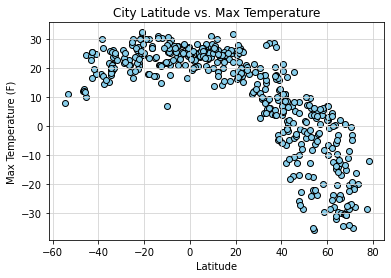

In [10]:
# Generating a scatter plot of Latitude vs. Temperature 
plt.scatter(weather_data_df["Lat"],weather_data_df["Max Temp"],edgecolors="black",facecolors="skyblue")
plt.title("City Latitude vs. Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.savefig("fig1.png")
plt.show()

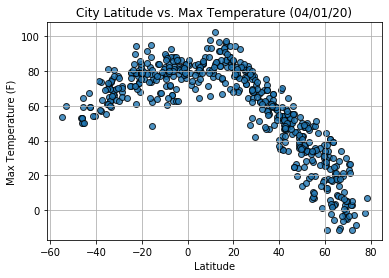

## Latitude vs. Humidity Plot

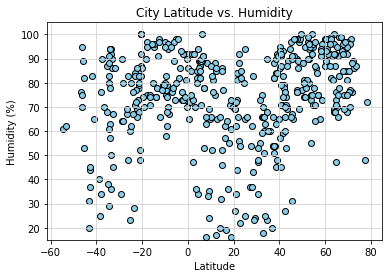

In [11]:
# Generating a scatter plot of Latitude vs. Humidity Plot
plt.scatter(weather_data_df["Lat"],weather_data_df["Humidity"],edgecolors="black",facecolors="skyblue")
plt.title("City Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.ylim(15,105)
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.savefig("fig2.png")
plt.show()

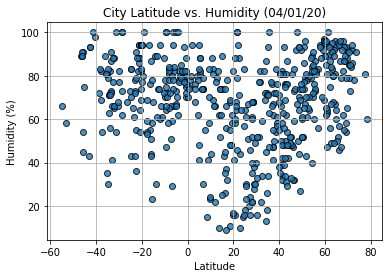

## Latitude vs. Cloudiness Plot

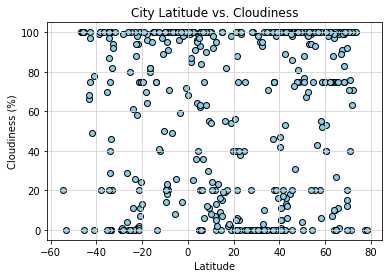

In [12]:
# Generating a scatter plot of Latitude vs. Cloudiness
plt.scatter(weather_data_df["Lat"],weather_data_df["Cloudiness"],edgecolors="black",facecolors="skyblue")
plt.title("City Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.savefig("fig3.png")
plt.show()

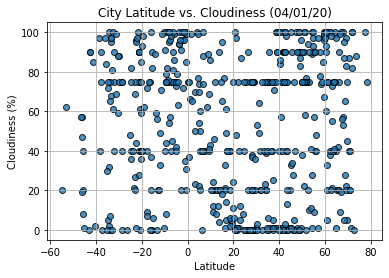

## Latitude vs. Wind Speed Plot

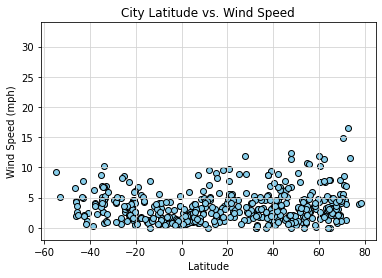

In [13]:
# Generating a scatter plot of Latitude vs. Wind Speed
plt.scatter(weather_data_df["Lat"],weather_data_df["Wind Speed"],edgecolors="black",facecolors="skyblue")
plt.title("City Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.ylim(-2,34)
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.savefig("fig4.png")
plt.show()

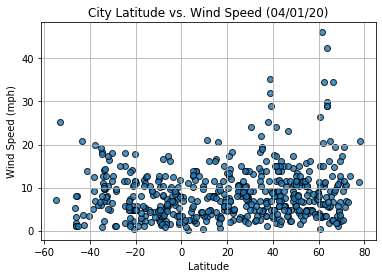

## Linear Regression

In [14]:
# Create Northern and Southern Hemisphere DataFrames

# Generating the Northern Hemisphere DataFrame
northern_hemisphere = weather_data_df.loc[weather_data_df["Lat"] >= 0]
northern_cities_count = len(northern_hemisphere)
print("There are {} cities in the northern hemisphere out of {} cities total, representing {:.1%} of all cities in the data set."
     .format(northern_cities_count, city_left_count, (northern_cities_count/city_left_count)))

# Generating the Southern Hemisphere DataFrame
southern_hemisphere = weather_data_df.loc[weather_data_df["Lat"] < 0]
southern_cities_count = len(southern_hemisphere)
print("There are {} cities in the southern hemisphere out of {} cities total, representing {:.1%} of all cities in the data set."
     .format(southern_cities_count, city_left_count, (southern_cities_count/city_left_count)))

There are 310 cities in the northern hemisphere out of 608 cities total, representing 51.0% of all cities in the data set.
There are 147 cities in the southern hemisphere out of 608 cities total, representing 24.2% of all cities in the data set.


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.719094050502069


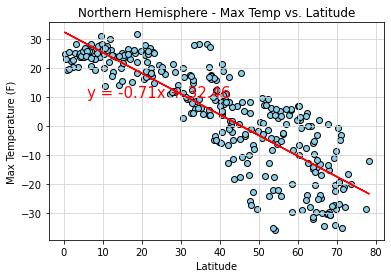

In [15]:
# Generating a linear regression model of Max Temp vs. Latitude on the Northern Hemisphere
x_values = northern_hemisphere["Lat"]
y_values = northern_hemisphere["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(northern_hemisphere["Lat"],northern_hemisphere["Max Temp"],edgecolors="black",facecolors="skyblue")
plt.title("Northern Hemisphere - Max Temp vs. Latitude")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
print(f"The r-squared is: {rvalue**2}")
plt.savefig("fig5.png")
plt.show()

The r-value is: 0.46937863826630627


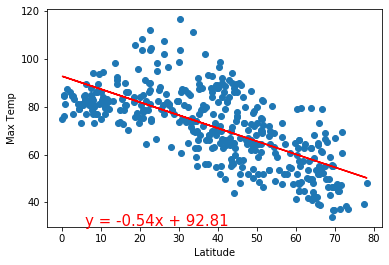

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.2041630379044996


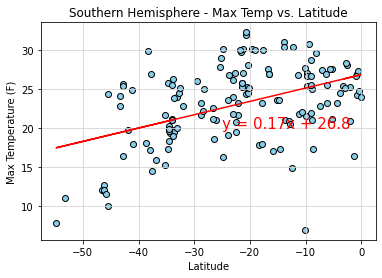

In [16]:
# Generating a linear regression model of Max Temp vs. Latitude on the Southern Hemisphere
x_values = southern_hemisphere["Lat"]
y_values = southern_hemisphere["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(southern_hemisphere["Lat"],southern_hemisphere["Max Temp"],edgecolors="black",facecolors="skyblue")
plt.title("Southern Hemisphere - Max Temp vs. Latitude")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-25,20),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
print(f"The r-squared is: {rvalue**2}")
plt.savefig("fig6.png")
plt.show()

The r-value is: 0.6082708688906918


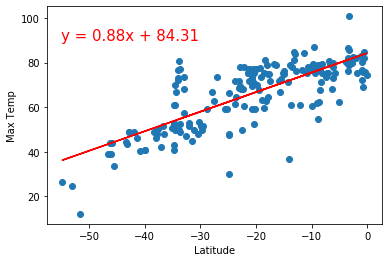

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.13141352554170868


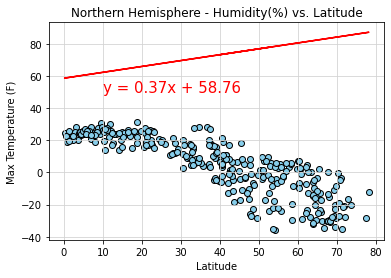

In [17]:
# Generating a linear regression model of Humidity vs. Latitude on the Northern Hemisphere
x_values = northern_hemisphere["Lat"]
y_values = northern_hemisphere["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(northern_hemisphere["Lat"],northern_hemisphere["Max Temp"],edgecolors="black",facecolors="skyblue")
plt.title("Northern Hemisphere - Humidity(%) vs. Latitude")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,50),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
print(f"The r-squared is: {rvalue**2}")
plt.savefig("fig7.png")
plt.show()

The r-value is: 0.000543987878808455


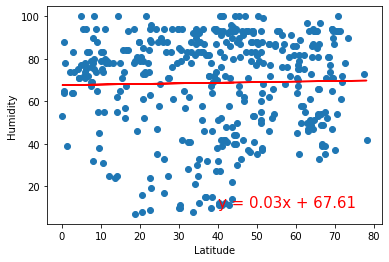

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.16566869937724474


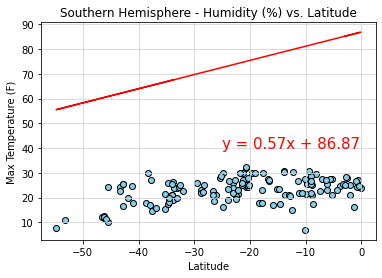

In [18]:
# Generating a linear regression model of Humidity vs. Latitude on the Southern Hemisphere
x_values = southern_hemisphere["Lat"]
y_values = southern_hemisphere["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(southern_hemisphere["Lat"],southern_hemisphere["Max Temp"],edgecolors="black",facecolors="skyblue")
plt.title("Southern Hemisphere - Humidity (%) vs. Latitude")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-25,40),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
print(f"The r-squared is: {rvalue**2}")
plt.savefig("fig8.png")
plt.show()

The r-value is: 0.014985174297345524


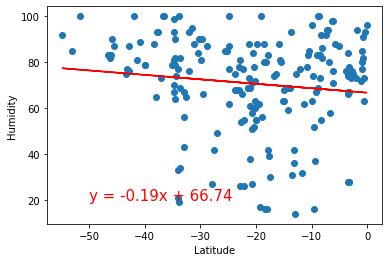

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.029734845809741887


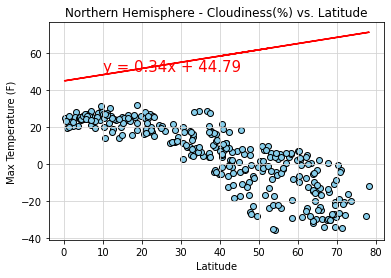

In [19]:
# Generating a linear regression model of Cloudiness vs. Latitude on the Northern Hemisphere
x_values = northern_hemisphere["Lat"]
y_values = northern_hemisphere["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(northern_hemisphere["Lat"],northern_hemisphere["Max Temp"],edgecolors="black",facecolors="skyblue")
plt.title("Northern Hemisphere - Cloudiness(%) vs. Latitude")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,50),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
print(f"The r-squared is: {rvalue**2}")
plt.savefig("fig9.png")
plt.show()

The r-value is: 0.0020898727664228514


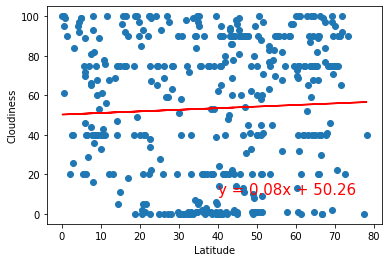

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.016857311168146604


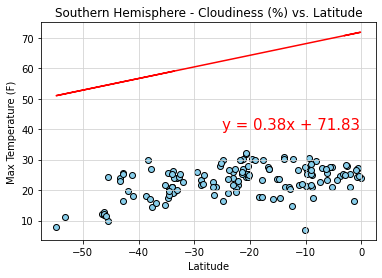

In [20]:
# Generating a linear regression model of Cloudiness vs. Latitude on the Southern Hemisphere
x_values = southern_hemisphere["Lat"]
y_values = southern_hemisphere["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(southern_hemisphere["Lat"],southern_hemisphere["Max Temp"],edgecolors="black",facecolors="skyblue")
plt.title("Southern Hemisphere - Cloudiness (%) vs. Latitude")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-25,40),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
print(f"The r-squared is: {rvalue**2}")
plt.savefig("fig10.png")
plt.show()

The r-value is: 0.0035263772085582894


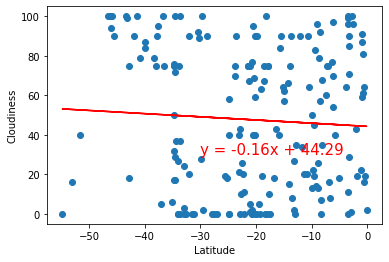

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.024761841620446985


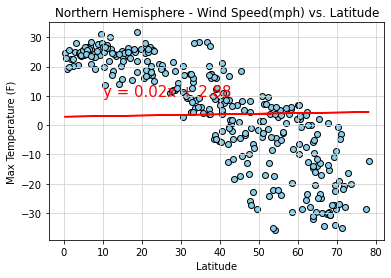

In [21]:
# Generating a linear regression model of Wind Speed vs. Latitude on the Northern Hemisphere
x_values = northern_hemisphere["Lat"]
y_values = northern_hemisphere["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(northern_hemisphere["Lat"],northern_hemisphere["Max Temp"],edgecolors="black",facecolors="skyblue")
plt.title("Northern Hemisphere - Wind Speed(mph) vs. Latitude")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,10),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
print(f"The r-squared is: {rvalue**2}")
plt.savefig("fig11.png")
plt.show()

The r-value is: 0.04019723576144484


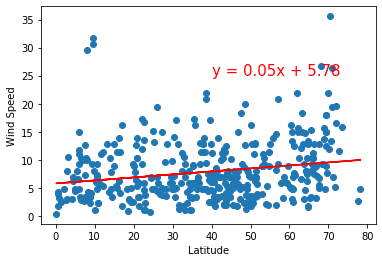

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.1575626716507163


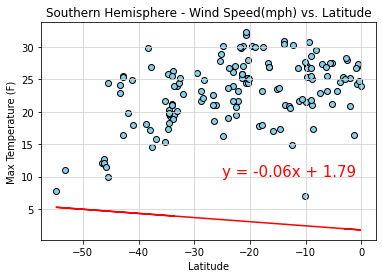

In [22]:
# Generating a linear regression model of Wind Speed vs. Latitude on the Southern Hemisphere
x_values = southern_hemisphere["Lat"]
y_values = southern_hemisphere["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(southern_hemisphere["Lat"],southern_hemisphere["Max Temp"],edgecolors="black",facecolors="skyblue")
plt.title("Southern Hemisphere - Wind Speed(mph) vs. Latitude")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-25,10),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
print(f"The r-squared is: {rvalue**2}")
plt.savefig("fig12.png")
plt.show()

The r-value is: 0.017128274759839232


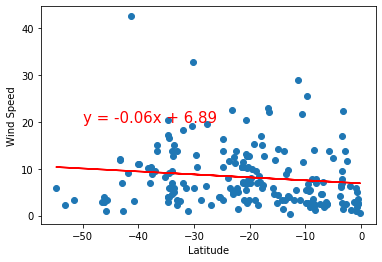